# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Wholesale_Data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
df.shape

(440, 8)

In [13]:
df['Channel'].value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

In [14]:
df['Region'].value_counts()

Region
3    316
1     77
2     47
Name: count, dtype: int64

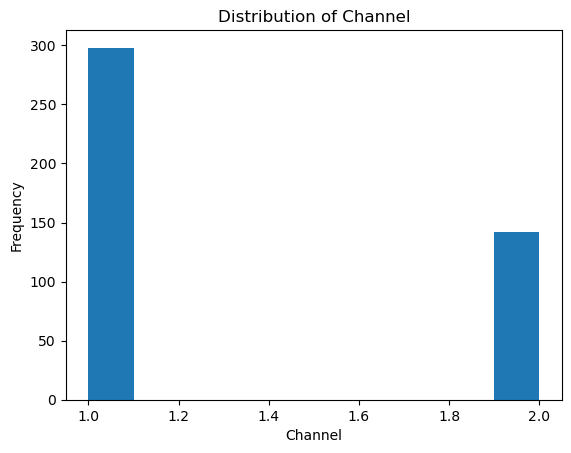

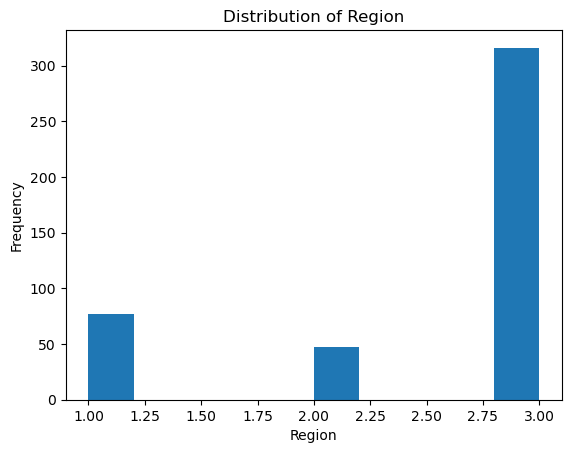

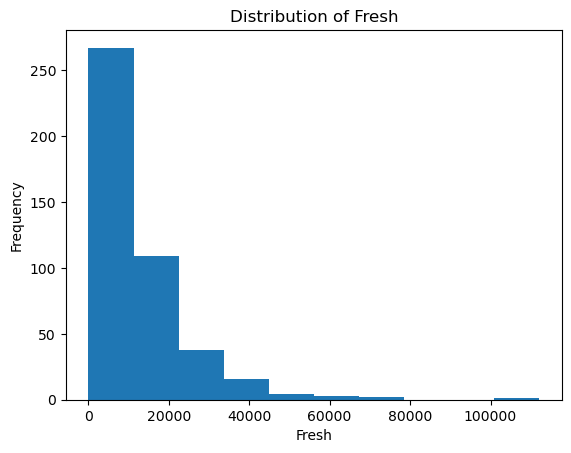

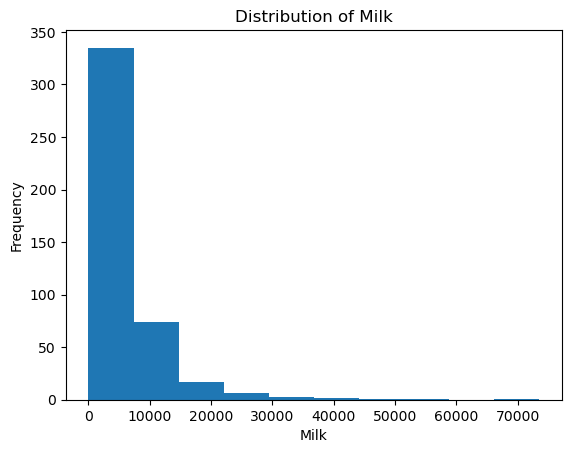

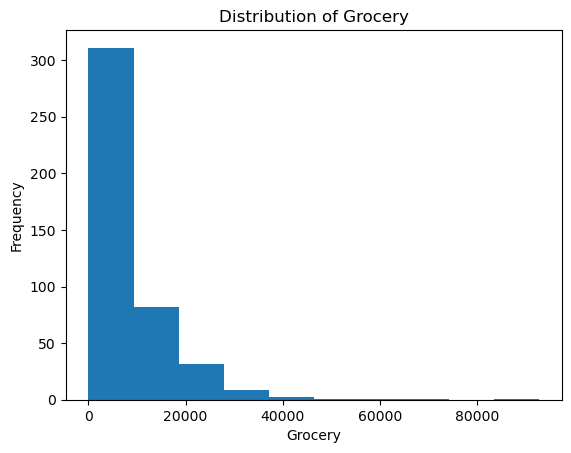

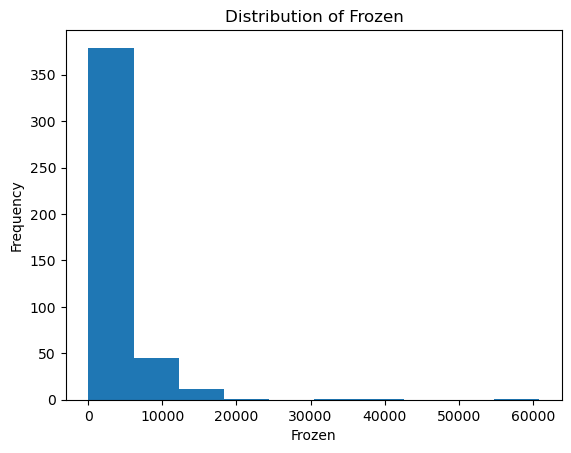

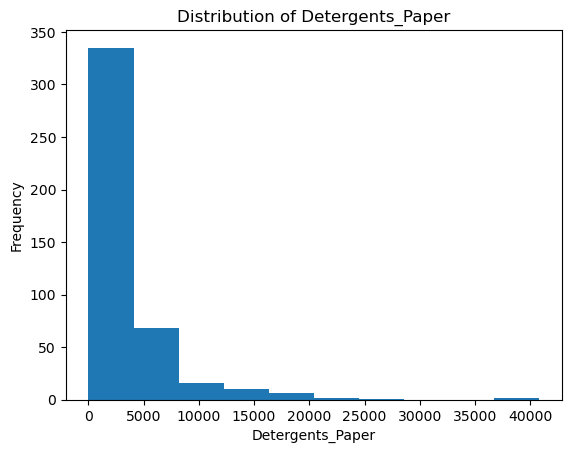

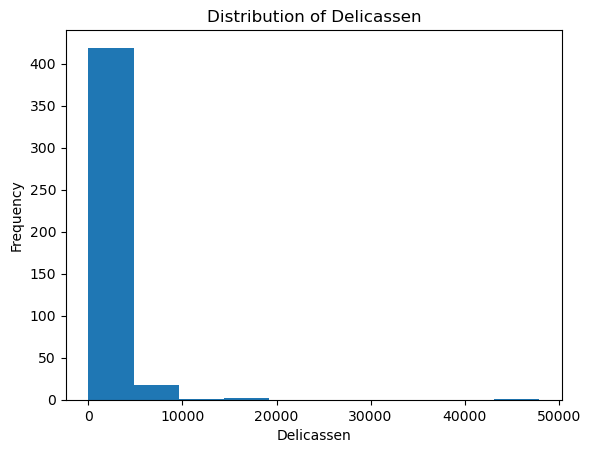

In [12]:
import matplotlib.pyplot as plt

for col in df:
    plt.hist(df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x12bf98f50>,
 'caps': [<matplotlib.lines.Line2D at 0x12bf998d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12bfa3c10>],
 'medians': [<matplotlib.lines.Line2D at 0x12bf9b190>],
 'fliers': [<matplotlib.lines.Line2D at 0x12bf9a750>],
 'means': []}

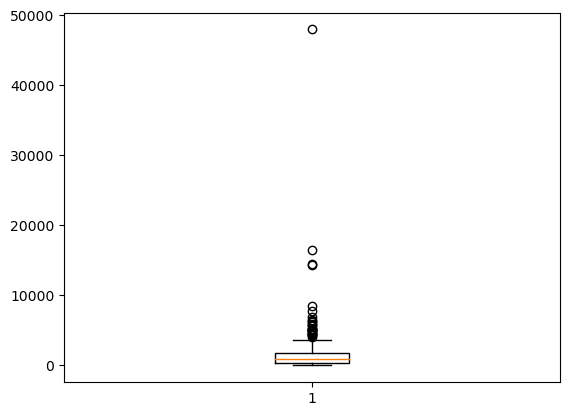

In [16]:
plt.boxplot(df['Delicassen'])

In [24]:
df_cleaned = df.copy()
df['Delicassen'].max()

df_cleaned.drop(df_cleaned['Delicassen'].idxmax(), inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x12da1b6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x12da58a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x12da1aed0>],
 'medians': [<matplotlib.lines.Line2D at 0x12da59cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12da1bfd0>],
 'means': []}

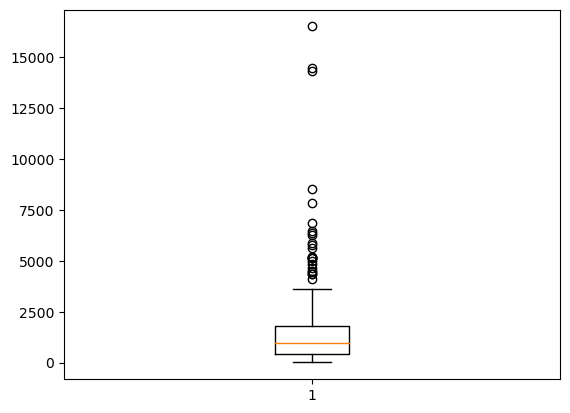

In [26]:
plt.boxplot(df_cleaned['Delicassen'])

In [31]:
df_cleaned.drop(df_cleaned[df_cleaned['Frozen'] > 3000].index, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned['Grocery'] > 5000].index, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned['Milk'] > 4500].index, inplace=True)
df_cleaned.drop(df_cleaned['Fresh'].idxmax(), inplace=True)
df_cleaned.drop(df_cleaned['Detergents_Paper'].idxmax(), inplace=True)

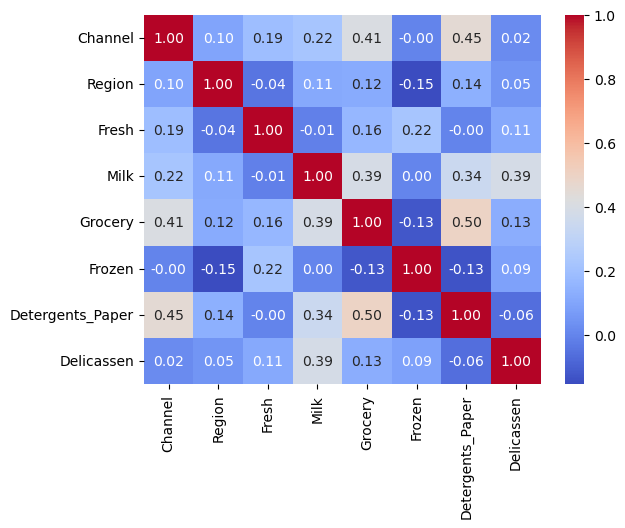

In [34]:
import seaborn as sns

correlation_matrix = df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

This shows any correlation that could be present. Like with Gorcery and detergents, detergents and channel 

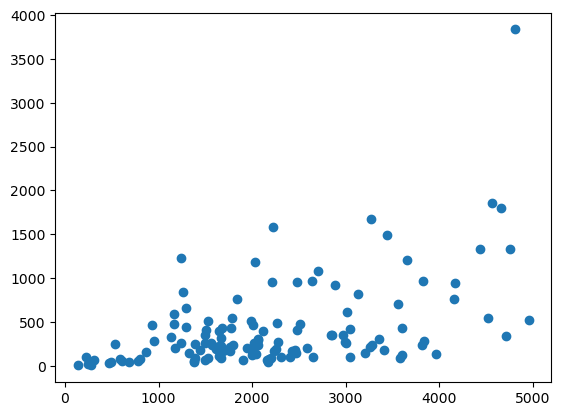

In [35]:
x = df_cleaned['Grocery']
y = df_cleaned['Detergents_Paper']
plt.scatter(x, y)

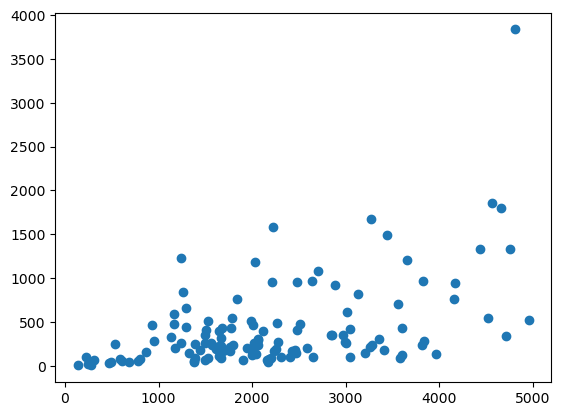

In [36]:
x1 = df_cleaned['Channel']
y = df_cleaned['Detergents_Paper']
plt.scatter(x, y)

In [37]:
df_log = df_cleaned.copy()

In [39]:
import numpy as np

for col in df_log.columns:
    df_log[col].replace(0, np.exp(-1), inplace=True)

In [42]:
for col in df_log:
    df_log[col] = df_log[col].apply(np.log)

In [43]:
df_cleaned.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
11,2,3,13146,1124,4523,1420,549,497
15,1,3,10253,1114,3821,397,964,412
27,1,3,14276,803,3045,485,100,518
31,1,3,2612,4339,3133,2088,820,985
32,1,3,21632,1318,2886,266,918,405


In [44]:
df_log.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
11,0.693147,1.098612,9.483873,7.024649,8.416931,7.258412,6.308098,6.208590
15,0.000000,1.098612,9.235326,7.015712,8.248267,5.983936,6.871091,6.021023
27,0.000000,1.098612,9.566335,6.688355,8.021256,6.184149,4.605170,6.249975
31,0.000000,1.098612,7.867871,8.375399,8.049746,7.643962,6.709304,6.892642
32,0.000000,1.098612,9.981929,7.183871,7.967627,5.583496,6.822197,6.003887


In [45]:
df_scaled = df_log.copy()

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled))
df_scaled.columns = df.columns

In [48]:
df_scaled

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,5.522681,0.513274,0.591664,-0.241876,1.338879,0.450291,0.710838,-0.006311
1,-0.181071,0.513274,0.377451,-0.253380,1.083609,-1.086145,1.217324,-0.171626
2,-0.181071,0.513274,0.662735,-0.674783,0.740030,-0.844780,-0.821169,0.030165
3,-0.181071,0.513274,-0.801106,1.496927,0.783149,0.915088,1.071776,0.596589
4,-0.181071,0.513274,1.020920,-0.036912,0.658862,-1.568893,1.173338,-0.186729
...,...,...,...,...,...,...,...,...
121,-0.181071,0.513274,0.226630,0.328034,0.985006,-3.658520,-0.978023,1.417849
122,-0.181071,0.513274,1.000153,-0.199075,1.414267,-1.555372,1.505510,-0.208765
123,-0.181071,0.513274,-1.038988,1.112178,-0.338654,0.548874,0.321147,0.936785
124,-0.181071,0.513274,0.380555,0.487640,0.269936,0.072521,-0.354446,1.274258


In [79]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

explained_variance_ratio = pca.explained_variance_ratio_

loadings = pca.components_

result_df = pd.DataFrame({'Explained Variance Ratio': explained_variance_ratio})


print(result_df)

   Explained Variance Ratio
0                  0.399848
1                  0.249270


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [62]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


In [53]:
X = df_scaled[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

In [54]:
X.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.591664,-0.241876,1.338879,0.450291,0.710838,-0.006311
1,0.377451,-0.253380,1.083609,-1.086145,1.217324,-0.171626
2,0.662735,-0.674783,0.740030,-0.844780,-0.821169,0.030165
3,-0.801106,1.496927,0.783149,0.915088,1.071776,0.596589
4,1.020920,-0.036912,0.658862,-1.568893,1.173338,-0.186729


/Users/yousufellithy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yousufellithy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yousufellithy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yousufellithy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default valu

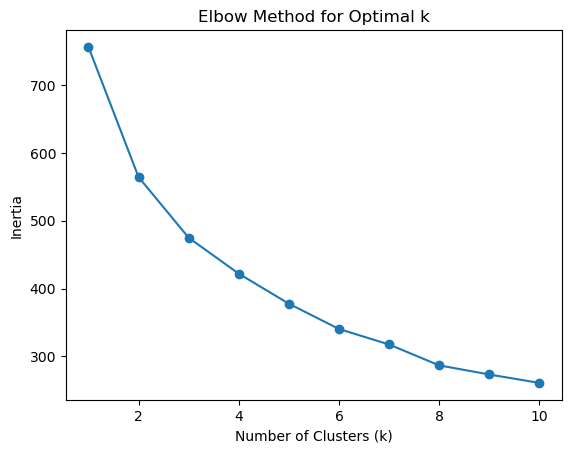

In [67]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
# looks like 2 is the optimal amount for clustering

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

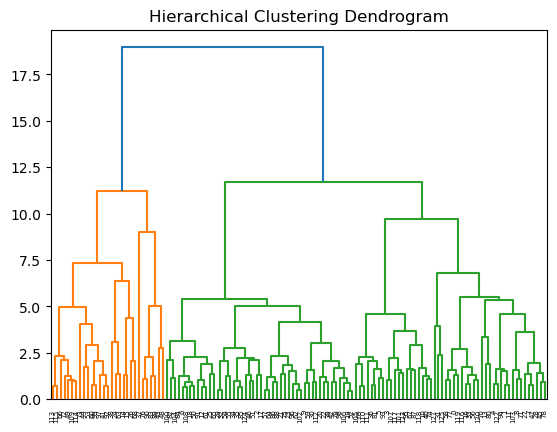

In [65]:
linkage_matrix = linkage(X, method='ward')  
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [ ]:
# look like 2 clusters is the best, 'correct' answer

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [59]:
pca = PCA(n_components=2)

In [60]:
X_pca = pca.fit_transform(X)

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

1. Our models concludes that given all the data, it appears that 2 seperate groups would be formed and all data would fit into one or the other.
2. Even though 2 clusters seems to be the optimal, it seems to be that even 3 or 4 clusters might potentially also work. 
3. All columns basically had no correlation to one another. Only one had around 0.5 the rest had very clost to 0 correlation.
4. Almost every column had very high outliers that were very far from the rest of the data, the wholesaler might want to focus on those since there was quite a few outliers that could generate huge revenue on their own. 